In [5]:
from phi.torch.flow import *
import numpy as np


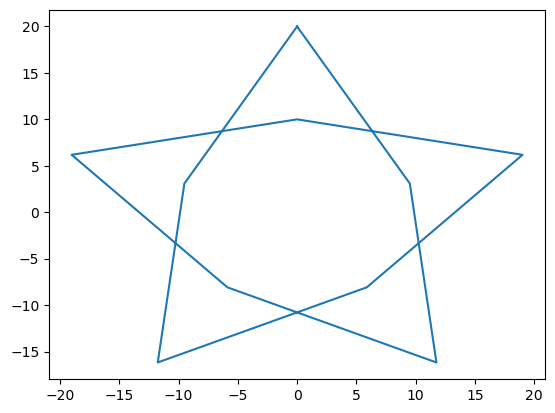

In [9]:
# Star
outer_radius = 20
inner_radius = 10
num_points = 5
angle = 2 * 3.14159 / num_points
vertices_star = []
for i in range(num_points * 2):
    radius = outer_radius if i % 2 == 0 else inner_radius
    x = radius * -1 * math.sin(i * angle)
    y = radius * math.cos(i * angle)
    vertices_star.append((x, y))

vertices_star = np.array(vertices_star)

import matplotlib.pyplot as plt
from shapely.geometry import Polygon

p = Polygon(vertices_star)
vrt = np.array(list(p.exterior.coords))

plt.plot(vrt[:,0], vrt[:,1])
plt.show()

# vertices = vertices_star
# vertices= wrap(vertices, spatial(vector='x,y'))


# pol = infinite_polygon(vertices=vertices)
# plot(pol)

In [ ]:
BOUNDARY_MASK = StaggeredGrid(Box(x=(-INF, 0.5), y=None), velocity.extrapolation, velocity.bounds, velocity.resolution)
pressure = None


@jit_compile  # Only for PyTorch, TensorFlow and Jax
def step(v, p, dt=1.):
    v = advect.semi_lagrangian(v, v, dt)
    v = v * (1 - BOUNDARY_MASK) + BOUNDARY_MASK * (SPEED, 0)
    return fluid.make_incompressible(v, [CYLINDER, CYLINDER2], Solve('auto', 1e-5, x0=p))


for _ in view('vorticity,velocity,pressure', namespace=globals()).range():
    velocity, pressure = step(velocity, pressure)
    vorticity = field.curl(velocity)
